In [12]:
import sys, os, importlib
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import src.portfolio_tracker.io as io
importlib.reload(io)                # reloads code from disk
from src.portfolio_tracker.io import load_holdings, fetch_prices


In [13]:
from pathlib import Path
from src.portfolio_tracker.io import load_holdings

csv_path = Path("../data/sample_holdings.csv").resolve()
print(csv_path)
holdings = load_holdings(str(csv_path))
holdings


/files/capstone_project_LB/data/sample_holdings.csv


,account_id,asset_id,asset_type,ticker,currency,quantity,avg_cost
0,acc1,asset_equity,Equity,AAPL,USD,10.00,150
1,acc1,asset_etf,ETF,SPY,USD,5.00,400
2,acc1,asset_crypto,Crypto,BTC-USD,USD,0.02,35000


Tickers: ['AAPL', 'SPY', 'BTC-USD']
Prices shape: (1056, 15)


AttributeError: module 'matplotlib' has no attribute 'show'

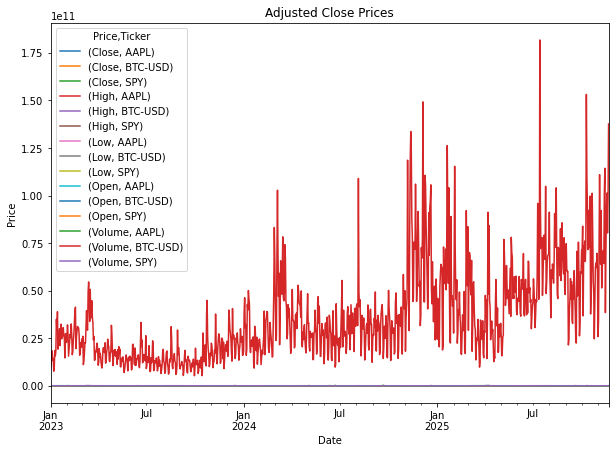

In [14]:
import matplotlib as plt
tickers = holdings["ticker"].astype(str)
print("Tickers:", tickers.tolist())
prices = fetch_prices(tickers, start="2023-01-01")
prices.head()


print("Prices shape:", prices.shape)
ax = prices.ffill().plot(figsize=(10,7))
ax.set_title("Adjusted Close Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
plt.show()


Prices shape: (1056, 15)


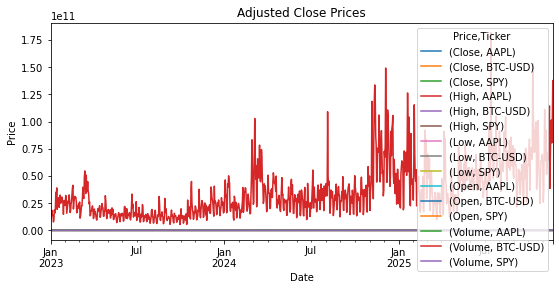

In [15]:
print("Prices shape:", prices.shape)

import matplotlib.pyplot as plt
ax = prices.ffill().plot(figsize=(9,4))
ax.set_title("Adjusted Close Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
plt.show()


In [29]:
import importlib, src.portfolio_tracker.transform as tf
importlib.reload(tf)
from src.portfolio_tracker.transform import daily_returns, portfolio_returns


In [30]:
rets = daily_returns(prices)
display(rets.head())
print("Returns shape:", rets.shape, "| median abs mean:", rets.mean().abs().median())


,AAPL,SPY,BTC-USD
date,,,
2023-01-03,-0.002140,0.028405,-0.005262
2023-01-04,0.013397,-0.035164,-0.015736
2023-01-05,0.002601,0.035901,-0.024214
2023-01-06,-0.010161,0.026214,0.009294
2023-01-09,0.007762,0.012033,0.016600


Returns shape: (750, 3) | median abs mean: 0.00015970595641152886


date
2025-11-11    1.162824
2025-11-12    1.130067
2025-11-13    1.139114
2025-11-14    1.142986
2025-11-17    1.146203
Freq: B, Name: portfolio, dtype: float64

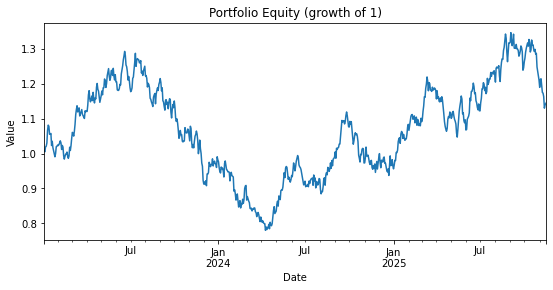

In [31]:
port_ret = portfolio_returns(holdings, prices)
equity = (1 + port_ret).cumprod()
display(equity.tail())

import matplotlib.pyplot as plt
equity.plot(figsize=(9,4))
plt.title("Portfolio Equity (growth of 1)")
plt.xlabel("Date"); plt.ylabel("Value")
plt.show()


In [32]:
import importlib, src.portfolio_tracker.kpis as kp
importlib.reload(kp)
from src.portfolio_tracker.kpis import kpi_table, drawdown

kpi_table(port_ret).style.format("{:.4f}")



,Cumulative Return,Ann. Vol,Sharpe,Max Drawdown
0,0.1462,0.2326,-21.3556,-0.3965


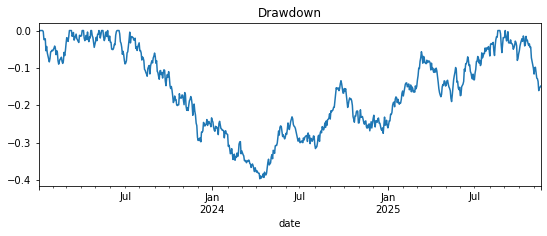

In [33]:
dd = drawdown((1+port_ret).cumprod())
dd.plot(figsize=(9,3))
plt.title("Drawdown")
plt.show()


In [34]:
print("Hello")

Hello


In [41]:
import importlib, src.portfolio_tracker.risk_models as rm
importlib.reload(rm)
from src.portfolio_tracker.risk_models import realized_vol, build_vol_dataset


In [42]:
import sys
from pathlib import Path

ROOT = Path.cwd().resolve()
sys.path.append(str(ROOT))   # make sure "src" is importable


In [43]:
from pathlib import Path
import sys

# Find project root by walking up until we see a "src" folder
ROOT = Path.cwd()
while ROOT != ROOT.parent and not (ROOT / "src").exists():
    ROOT = ROOT.parent

print("Project root detected as:", ROOT)

# Add root to Python path so "src" becomes importable
sys.path.insert(0, str(ROOT))


Project root detected as: /files/capstone_project_LB


In [44]:
import importlib
import src.portfolio_tracker.risk_models as rm
importlib.reload(rm)

from src.portfolio_tracker.risk_models import realized_vol, build_vol_dataset



In [45]:
X, y = build_vol_dataset(
    port_ret,
    vol_windows=(5, 10, 20),
    ret_windows=(1, 5, 10),
    horizon=5,
)

print("X shape:", X.shape)
print("y shape:", y.shape)
display(X.head())
display(y.head())


X shape: (727, 6)
y shape: (727,)


,rv_5d,rv_10d,rv_20d,ret_1d_sum,ret_5d_sum,ret_10d_sum
date,,,,,,
2023-01-30,0.170491,0.231763,0.235606,0.001166,0.013455,-0.031932
2023-01-31,0.148281,0.232549,0.234427,0.003430,0.024908,-0.030716
2023-02-01,0.118743,0.172044,0.234193,-0.001504,0.032138,0.000460
2023-02-02,0.117439,0.161089,0.229726,0.002853,0.025422,-0.008742
2023-02-03,0.033527,0.134712,0.230115,0.004571,0.010515,0.013700


date
2023-01-30    0.033527
2023-01-31    0.039658
2023-02-01    0.066742
2023-02-02    0.144438
2023-02-03    0.167865
Freq: B, Name: rv_next_5d, dtype: float64

In [ ]:
holy shit that works

In [2]:
!curl -I https://finance.yahoo.com

HTTP/2 429 
date: Thu, 20 Nov 2025 09:12:36 GMT
server: ATS
x-content-type-options: nosniff
referrer-policy: no-referrer-when-downgrade
content-length: 23
content-type: text/html



In [8]:
import yfinance as yf
df = yf.download("AAPL", start="2024-01-01", end="2024-02-01", progress=False)
df.head()

Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)

1 Failed download:
['AAPL']: Exception('%ticker%: No timezone found, symbol may be delisted')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [4]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [6]:
import yfinance as yf
print(yf.Ticker("AAPL").history(period="1d"))


Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)
AAPL: No price data found, symbol may be delisted (period=1d)


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [6]:
import sys
print(sys.executable)


/opt/conda/bin/python


In [ ]:
conda install -n myenv yfinance


In [3]:
prompt_holdings_csv()


NameError: name 'prompt_holdings_csv' is not defined

In [4]:
import src.prompt_holdings_csv as ph
ph()

ModuleNotFoundError: No module named 'src'

In [5]:
from pathlib import Path
from src.portfolio_tracker.io import prompt_holding_csv

ModuleNotFoundError: No module named 'src'